<a href="https://colab.research.google.com/github/ryyutku/Iris-EDA/blob/main/Version3/Iris_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [259]:
from sklearn.datasets import load_iris # Loading the Iris dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from collections import Counter
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import learning_curve


In [260]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names) # Converting the dataset from iris into a pandas Dataframe
df['target'] = iris.target # Getting the iris target column
df_original = df.copy() # Making a copy of the dataset

In [261]:
df.head() # printing the first few rows of the dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [262]:
df.dtypes #  Checking the dtypes of the dataset

,0
sepal length (cm),float64
sepal width (cm),float64
petal length (cm),float64
petal width (cm),float64
target,int64


In [263]:
df.shape

(150, 5)

In [264]:
df.describe() # checking for description statistics

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [265]:
df.isnull().sum() # Checking for missing values

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
target,0


## **Exploratory Data analysis (EDA)**

####**Checking for Class imbalance**

In [266]:
# Checking for imbalance in the dataset
class_counts = df['target'].value_counts()
print(class_counts)

target
0    50
1    50
2    50
Name: count, dtype: int64


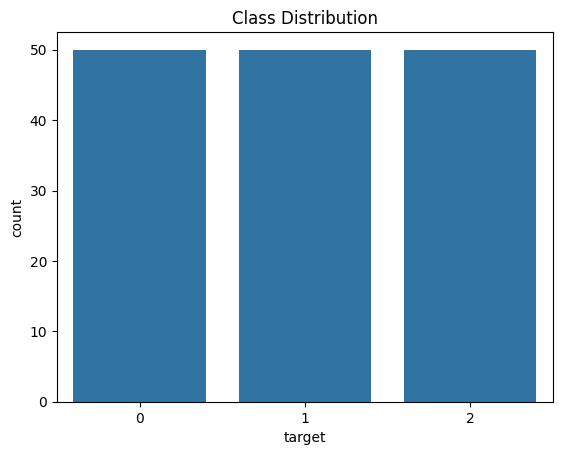

In [267]:
# Plotting imbalance using countplot
sns.countplot(x=df['target'])
plt.title("Class Distribution")
plt.show()

The dataset is well balanced

##**Test Running a model**

Accuracy: 0.9667

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



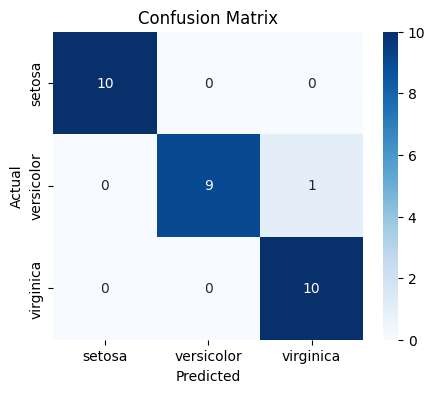

Cross-Validation Accuracy (Random Forest): 0.9417 ± 0.0204


In [268]:
# Split data into training and testing sets
X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=8,            # Reduce tree depth
    min_samples_split=5,    # Require more samples to split a node
    min_samples_leaf=3,     # Require more samples per leaf
    max_features='sqrt',    # Use fewer features per tree
    random_state=42
)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### **Cross-validation to check for overfitting**
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)
print(f"Cross-Validation Accuracy (Random Forest): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

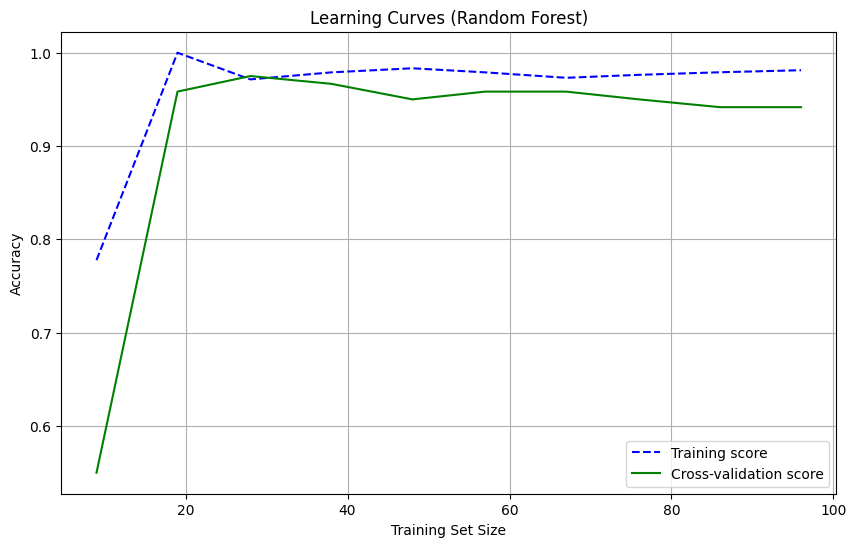

In [269]:
# Learning Curves to check for overfitting
train_sizes, train_scores, test_scores = learning_curve(rf_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Training score", color="blue", linestyle='--')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Cross-validation score", color="green", linestyle='-')
plt.title("Learning Curves (Random Forest)")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.show()


In [270]:
# Compute learning curve scores
train_sizes, train_scores, test_scores = learning_curve(rf_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# Compute mean training and validation scores
mean_train_scores = np.mean(train_scores, axis=1)
mean_test_scores = np.mean(test_scores, axis=1)

# Compute generalization gap
generalization_gap = mean_train_scores - mean_test_scores

# Print results
for size, train, test, gap in zip(train_sizes, mean_train_scores, mean_test_scores, generalization_gap):
    print(f"Training Size: {size}, Train Score: {train:.4f}, Test Score: {test:.4f}, Generalization Gap: {gap:.4f}")

Training Size: 9, Train Score: 0.7778, Test Score: 0.5500, Generalization Gap: 0.2278
Training Size: 19, Train Score: 1.0000, Test Score: 0.9583, Generalization Gap: 0.0417
Training Size: 28, Train Score: 0.9714, Test Score: 0.9750, Generalization Gap: -0.0036
Training Size: 38, Train Score: 0.9789, Test Score: 0.9667, Generalization Gap: 0.0123
Training Size: 48, Train Score: 0.9833, Test Score: 0.9500, Generalization Gap: 0.0333
Training Size: 57, Train Score: 0.9789, Test Score: 0.9583, Generalization Gap: 0.0206
Training Size: 67, Train Score: 0.9731, Test Score: 0.9583, Generalization Gap: 0.0148
Training Size: 76, Train Score: 0.9763, Test Score: 0.9500, Generalization Gap: 0.0263
Training Size: 86, Train Score: 0.9791, Test Score: 0.9417, Generalization Gap: 0.0374
Training Size: 96, Train Score: 0.9812, Test Score: 0.9417, Generalization Gap: 0.0396


##**EDA using binning for the petal_length column**

In [271]:
df['petal_length_qcut'] = pd.qcut(df['petal length (cm)'], q=9)

In [272]:
df.groupby('petal_length_qcut')['target'].mean()

<ipython-input-272-4ce166c60ccf>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('petal_length_qcut')['target'].mean()


,target
petal_length_qcut,
"(0.999, 1.4]",0.000000
"(1.4, 1.5]",0.000000
"(1.5, 2.633]",0.000000
"(2.633, 4.1]",1.000000
"(4.1, 4.5]",1.055556
"(4.5, 4.9]",1.294118
"(4.9, 5.189]",1.833333
"(5.189, 5.7]",2.000000
"(5.7, 6.9]",2.000000


In [273]:
df.groupby('petal_length_qcut')['target'].value_counts()

<ipython-input-273-70bab6250aa4>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('petal_length_qcut')['target'].value_counts()


petal_length_qcut  target
(0.999, 1.4]       0         24
                   1          0
                   2          0
(1.4, 1.5]         0         13
                   1          0
                   2          0
(1.5, 2.633]       0         13
                   1          0
                   2          0
(2.633, 4.1]       1         19
                   0          0
                   2          0
(4.1, 4.5]         1         17
                   2          1
                   0          0
(4.5, 4.9]         1         12
                   2          5
                   0          0
(4.9, 5.189]       2         10
                   1          2
                   0          0
(5.189, 5.7]       2         18
                   0          0
                   1          0
(5.7, 6.9]         2         16
                   0          0
                   1          0
Name: count, dtype: int64

In [274]:
df['petal_length_qcut'].dtype

CategoricalDtype(categories=[(0.999, 1.4],   (1.4, 1.5], (1.5, 2.633], (2.633, 4.1],
                    (4.1, 4.5],   (4.5, 4.9], (4.9, 5.189], (5.189, 5.7],
                    (5.7, 6.9]],
, ordered=True, categories_dtype=interval[float64, right])

From the above analysis it is evident that \
from the range of 0.999 to 2.633 there is a 100% chance that it would belong to 0 category. \
from the range of 2.633 to 4.1 there is a 100% chance that it would be a 1 category. \
from the range of 5.189-6.9 there is a 100% chance that it would be a 2. \
from 4.1 to 4.5 there is a 94.4% chance that it would be a 1 and a 5.5% chance it would be a 2. \
from 4.5 to 4.9 there is a 70.5% chance that it would be a 1 and a 29% chance it would be a 2. \
from 4.9 to 5.189 there is a 83.3% chance that it would be a 2 and a 16.7% chance it would be a 1. \


In [275]:
print(df['petal_length_qcut'].unique())

[(0.999, 1.4], (1.4, 1.5], (1.5, 2.633], (4.5, 4.9], (4.1, 4.5], (2.633, 4.1], (4.9, 5.189], (5.7, 6.9], (5.189, 5.7]]
Categories (9, interval[float64, right]): [(0.999, 1.4] < (1.4, 1.5] < (1.5, 2.633] < (2.633, 4.1] <
                                           ... < (4.5, 4.9] < (4.9, 5.189] < (5.189, 5.7] <
                                           (5.7, 6.9]]


In [276]:
df['petal_length_qcut'] = df['petal_length_qcut'].astype(str)

In [277]:
# Mapping the percentages
percentage_mapping = {
    '(0.999, 1.4]': 99.9,
    '(1.4, 1.5]': 99.9,
    '(1.5, 2.633]': 99.9,
    '(2.633, 4.1]': 99.9,
    '(4.1, 4.5]': 94.4,
    '(4.5, 4.9]': 70.5,
    '(4.9, 5.189]': 83.3,
    '(5.189, 5.7]': 99.9,
    '(5.7, 6.9]': 99.9
}

In [278]:
df['petal_length_prob'] = df['petal_length_qcut'].map(percentage_mapping)

In [279]:
# Performing the mapping based on the string values of the bin categories
df.loc[df['petal_length_qcut'] == '(0.999, 1.4]', 'petal_length_qcut'] = 0
df.loc[(df['petal_length_qcut'] == '(1.4, 1.5]'), 'petal_length_qcut'] = 0  # 100%
df.loc[(df['petal_length_qcut'] == '(1.5, 2.633]'), 'petal_length_qcut'] = 0  # 100%
df.loc[(df['petal_length_qcut'] == '(2.633, 4.1]'), 'petal_length_qcut'] = 1  # 100%
df.loc[(df['petal_length_qcut'] == '(4.1, 4.5]'), 'petal_length_qcut'] = 1  # 94.4%
df.loc[(df['petal_length_qcut'] == '(4.5, 4.9]'), 'petal_length_qcut'] = 1  # 70.5%
df.loc[(df['petal_length_qcut'] == '(4.9, 5.189]'), 'petal_length_qcut'] = 2  # 83.3%
df.loc[(df['petal_length_qcut'] == '(5.189, 5.7]'), 'petal_length_qcut'] = 2  # 100%
df.loc[df['petal_length_qcut'] == '(5.7, 6.9]', 'petal_length_qcut'] = 2  # 100%

In [280]:
# Display the updated dataframe
print(df[['petal length (cm)', 'petal_length_qcut','petal_length_prob']].head())

   petal length (cm) petal_length_qcut  petal_length_prob
0                1.4                 0               99.9
1                1.4                 0               99.9
2                1.3                 0               99.9
3                1.5                 0               99.9
4                1.4                 0               99.9


In [281]:
df['petal_length_qcut'] = df['petal_length_qcut'].astype(int)

##**Test running the model after binning for petal length**

Accuracy: 0.9667

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



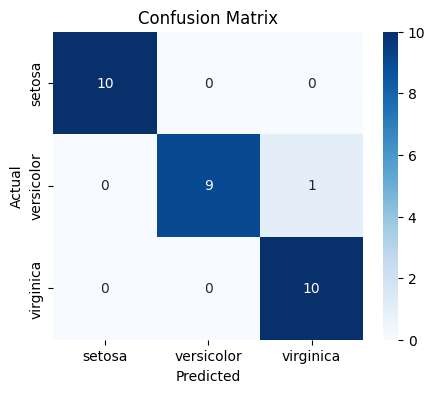

Cross-Validation Accuracy (Random Forest): 0.9667 ± 0.0167


In [283]:
# Split data into training and testing sets
X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=8,            # Reduce tree depth
    min_samples_split=5,    # Require more samples to split a node
    min_samples_leaf=3,     # Require more samples per leaf
    max_features='sqrt',    # Use fewer features per tree
    random_state=42
)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### **Cross-validation to check for overfitting**
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)
print(f"Cross-Validation Accuracy (Random Forest): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


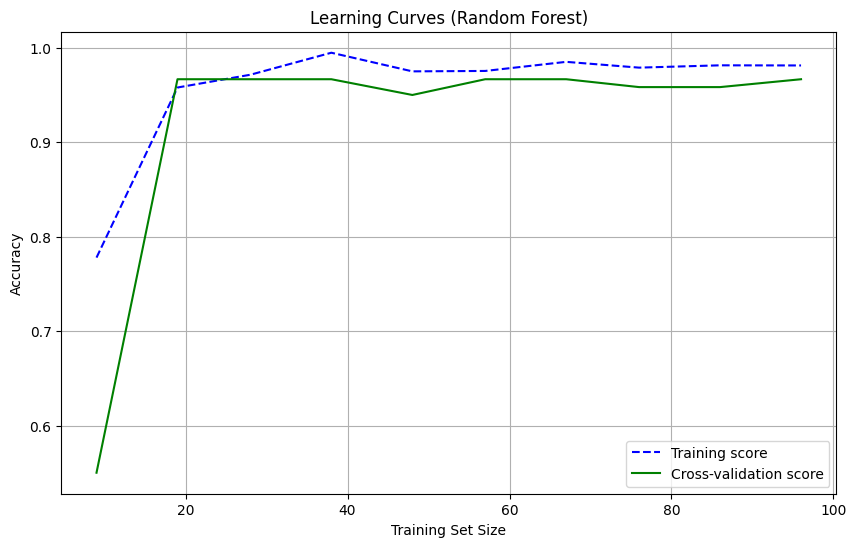

In [284]:
train_sizes, train_scores, test_scores = learning_curve(rf_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Training score", color="blue", linestyle='--')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Cross-validation score", color="green", linestyle='-')
plt.title("Learning Curves (Random Forest)")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.show()


In [285]:
# Compute learning curve scores
train_sizes, train_scores, test_scores = learning_curve(rf_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# Compute mean training and validation scores
mean_train_scores = np.mean(train_scores, axis=1)
mean_test_scores = np.mean(test_scores, axis=1)

# Compute generalization gap
generalization_gap = mean_train_scores - mean_test_scores

# Print results
for size, train, test, gap in zip(train_sizes, mean_train_scores, mean_test_scores, generalization_gap):
    print(f"Training Size: {size}, Train Score: {train:.4f}, Test Score: {test:.4f}, Generalization Gap: {gap:.4f}")

Training Size: 9, Train Score: 0.7778, Test Score: 0.5500, Generalization Gap: 0.2278
Training Size: 19, Train Score: 0.9579, Test Score: 0.9667, Generalization Gap: -0.0088
Training Size: 28, Train Score: 0.9714, Test Score: 0.9667, Generalization Gap: 0.0048
Training Size: 38, Train Score: 0.9947, Test Score: 0.9667, Generalization Gap: 0.0281
Training Size: 48, Train Score: 0.9750, Test Score: 0.9500, Generalization Gap: 0.0250
Training Size: 57, Train Score: 0.9754, Test Score: 0.9667, Generalization Gap: 0.0088
Training Size: 67, Train Score: 0.9851, Test Score: 0.9667, Generalization Gap: 0.0184
Training Size: 76, Train Score: 0.9789, Test Score: 0.9583, Generalization Gap: 0.0206
Training Size: 86, Train Score: 0.9814, Test Score: 0.9583, Generalization Gap: 0.0231
Training Size: 96, Train Score: 0.9812, Test Score: 0.9667, Generalization Gap: 0.0146


##**EDA using binning for the sepal_width column**

In [286]:
df['sepal_width_qcut'] = pd.qcut(df['sepal width (cm)'], q=10, duplicates="drop")

In [287]:
df.groupby('sepal_width_qcut')['target'].value_counts()

<ipython-input-287-1046fda908b0>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('sepal_width_qcut')['target'].value_counts()


sepal_width_qcut  target
(1.999, 2.5]      1         13
                  2          5
                  0          1
(2.5, 2.7]        1          8
                  2          6
                  0          0
(2.7, 2.8]        2          8
                  1          6
                  0          0
(2.8, 3.0]        1         15
                  2         14
                  0          7
(3.0, 3.1]        0          4
                  2          4
                  1          3
(3.1, 3.2]        0          5
                  2          5
                  1          3
(3.2, 3.4]        0         11
                  2          5
                  1          2
(3.4, 3.61]       0          9
                  2          1
                  1          0
(3.61, 4.4]       0         13
                  2          2
                  1          0
Name: count, dtype: int64

In [288]:
df['sepal_width_qcut'].unique()

[(3.4, 3.61], (2.8, 3.0], (3.1, 3.2], (3.0, 3.1], (3.61, 4.4], (3.2, 3.4], (1.999, 2.5], (2.7, 2.8], (2.5, 2.7]]
Categories (9, interval[float64, right]): [(1.999, 2.5] < (2.5, 2.7] < (2.7, 2.8] < (2.8, 3.0] < ... <
                                           (3.1, 3.2] < (3.2, 3.4] < (3.4, 3.61] < (3.61, 4.4]]

In [289]:
df['sepal_width_qcut'] = df['sepal_width_qcut'].astype(str)

In [290]:
#mapping
sepal_width_percentage_mapping = {
    '(1.999, 2.5]': 68.42,
    '(2.5, 2.7]': 57.14,
    '(2.7, 2.8]': 57.14,
    '(2.8, 3.0]': 42.86,
    '(3.0, 3.1]': 36.36,
    '(3.1, 3.2]': 38.46,
    '(3.2, 3.4]': 61.11,
    '(3.4, 3.61]': 90,
    '(3.61, 4.4]': 86.67
}

In [291]:
df['sepal_width_prob'] = df['sepal_width_qcut'].map(sepal_width_percentage_mapping)

In [292]:
# Performing the mapping based on the string values of the bin categories
df.loc[df['sepal_width_qcut'] == '(1.999, 2.5]', 'sepal_width_qcut'] = 1 # 68.42%
df.loc[(df['sepal_width_qcut'] == '(2.5, 2.7]'), 'sepal_width_qcut'] = 1 # 57.14%
df.loc[(df['sepal_width_qcut'] == '(2.7, 2.8]'), 'sepal_width_qcut'] = 2 # 57.14%
df.loc[(df['sepal_width_qcut'] == '(2.8, 3.0]'), 'sepal_width_qcut'] = 1 # 42.86%
df.loc[(df['sepal_width_qcut'] == '(3.0, 3.1]'), 'sepal_width_qcut'] = 0 # 36.36%
df.loc[(df['sepal_width_qcut'] == '(3.1, 3.2]'), 'sepal_width_qcut'] = 0 # 38.46%
df.loc[(df['sepal_width_qcut'] == '(3.2, 3.4]'), 'sepal_width_qcut'] = 0 # 61.11%
df.loc[(df['sepal_width_qcut'] == '(3.4, 3.61]'), 'sepal_width_qcut'] = 9 # 90%
df.loc[df['sepal_width_qcut'] == '(3.61, 4.4]', 'sepal_width_qcut'] = 13 # 86.67%

In [293]:
df['sepal_width_qcut'] = df['sepal_width_qcut'].astype(int) #fillna(-1)

Accuracy: 0.9333

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



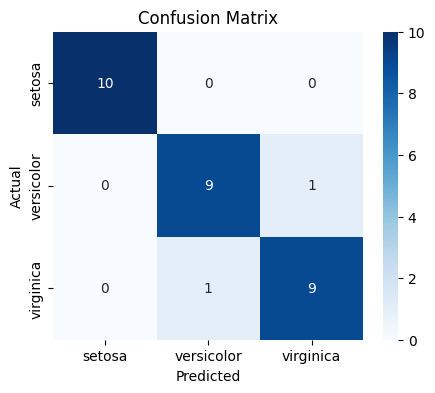

Cross-Validation Accuracy (Random Forest): 0.9667 ± 0.0167


In [295]:
# Split data into training and testing sets
X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=8,            # Reduce tree depth
    min_samples_split=5,    # Require more samples to split a node
    min_samples_leaf=3,     # Require more samples per leaf
    max_features='sqrt',    # Use fewer features per tree
    random_state=42
)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### **Cross-validation to check for overfitting**
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)
print(f"Cross-Validation Accuracy (Random Forest): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

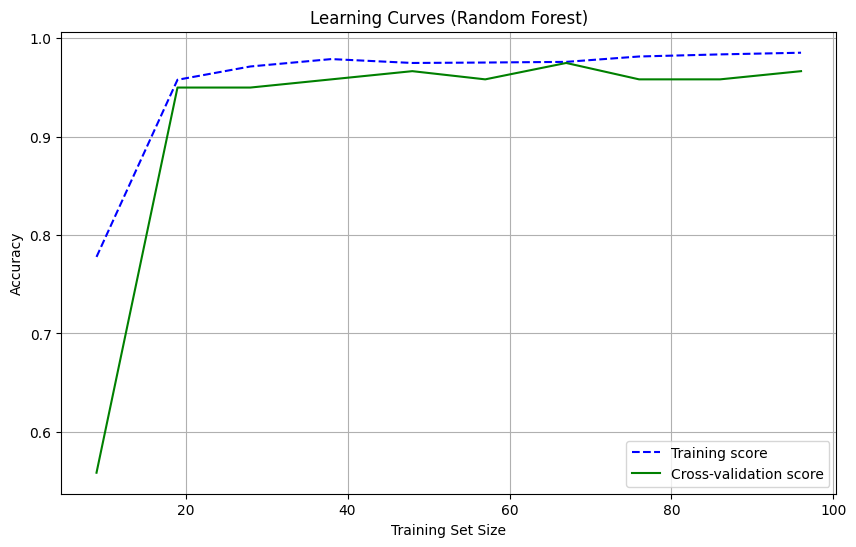

In [296]:
# Learning Curves to check for overfitting
train_sizes, train_scores, test_scores = learning_curve(rf_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Training score", color="blue", linestyle='--')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Cross-validation score", color="green", linestyle='-')
plt.title("Learning Curves (Random Forest)")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.show()


In [297]:
# Compute learning curve scores
train_sizes, train_scores, test_scores = learning_curve(rf_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# Compute mean training and validation scores
mean_train_scores = np.mean(train_scores, axis=1)
mean_test_scores = np.mean(test_scores, axis=1)

# Compute generalization gap
generalization_gap = mean_train_scores - mean_test_scores

# Print results
for size, train, test, gap in zip(train_sizes, mean_train_scores, mean_test_scores, generalization_gap):
    print(f"Training Size: {size}, Train Score: {train:.4f}, Test Score: {test:.4f}, Generalization Gap: {gap:.4f}")

Training Size: 9, Train Score: 0.7778, Test Score: 0.5583, Generalization Gap: 0.2194
Training Size: 19, Train Score: 0.9579, Test Score: 0.9500, Generalization Gap: 0.0079
Training Size: 28, Train Score: 0.9714, Test Score: 0.9500, Generalization Gap: 0.0214
Training Size: 38, Train Score: 0.9789, Test Score: 0.9583, Generalization Gap: 0.0206
Training Size: 48, Train Score: 0.9750, Test Score: 0.9667, Generalization Gap: 0.0083
Training Size: 57, Train Score: 0.9754, Test Score: 0.9583, Generalization Gap: 0.0171
Training Size: 67, Train Score: 0.9761, Test Score: 0.9750, Generalization Gap: 0.0011
Training Size: 76, Train Score: 0.9816, Test Score: 0.9583, Generalization Gap: 0.0232
Training Size: 86, Train Score: 0.9837, Test Score: 0.9583, Generalization Gap: 0.0254
Training Size: 96, Train Score: 0.9854, Test Score: 0.9667, Generalization Gap: 0.0188


The values are less than 0.4 so no overfitting and shows better generalization

##**EDA using binning for the sepal_length column**

In [298]:
df['sepal_length_qcut'] = pd.qcut(df['sepal length (cm)'], q=9, duplicates="drop")

In [299]:
df.groupby('sepal_length_qcut')['target'].value_counts()

<ipython-input-299-0ae6d85b9f0e>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('sepal_length_qcut')['target'].value_counts()


sepal_length_qcut          target
(4.2989999999999995, 4.9]  0         20
                           1          1
                           2          1
(4.9, 5.1]                 0         16
                           1          3
                           2          0
(5.1, 5.4]                 0          9
                           1          2
                           2          0
(5.4, 5.7]                 1         15
                           0          4
                           2          2
(5.7, 5.978]               1          5
                           2          4
                           0          1
(5.978, 6.3]               1         13
                           2         12
                           0          0
(6.3, 6.5]                 2          9
                           1          3
                           0          0
(6.5, 6.844]               2          7
                           1          6
                           0          0
(6.844, 7.9]               2         15
                           1          2
                           0          0
Name: count, dtype: int64

In [300]:
df['sepal_length_qcut'] = df['sepal_length_qcut'].astype(str)

In [301]:
#mapping
percentage_mapping = {
    '(4.2989999999999995, 4.9]': 90.9,
    '(4.9, 5.1]': 84.21,
    '(5.1, 5.4]': 81.8,
    '(5.4, 5.7]': 71.43,
    '(5.7, 5.978]': 50,
    '(5.978, 6.3]': 52,
    '(6.3, 6.5]': 75,
    '(6.5, 6.844]': 53.85,
    '(6.844, 7.9]': 88.23
}

In [302]:
df['sepal_length_prob'] = df['sepal_length_qcut'].map(percentage_mapping)

In [303]:
df['sepal_length_qcut'].unique()

array(['(4.9, 5.1]', '(4.2989999999999995, 4.9]', '(5.1, 5.4]',
       '(5.7, 5.978]', '(5.4, 5.7]', '(6.844, 7.9]', '(6.3, 6.5]',
       '(5.978, 6.3]', '(6.5, 6.844]'], dtype=object)

In [304]:
# # Performing the mapping based on the string values of the bin categories
df.loc[df['sepal_length_qcut'] == '(4.2989999999999995, 4.9]', 'sepal_length_qcut'] = 0 #90.9%
df.loc[(df['sepal_length_qcut'] == '(4.9, 5.1]'), 'sepal_length_qcut'] = 0  # 84.21%
df.loc[(df['sepal_length_qcut'] == '(5.1, 5.4]'), 'sepal_length_qcut'] = 0  # 81.8%
df.loc[(df['sepal_length_qcut'] == '(5.4, 5.7]'), 'sepal_length_qcut'] = 1  # 71.43%
df.loc[(df['sepal_length_qcut'] == '(5.7, 5.978]'), 'sepal_length_qcut'] = 1  # 50%
df.loc[(df['sepal_length_qcut'] == '(5.978, 6.3]'), 'sepal_length_qcut'] = 1  # 52%
df.loc[(df['sepal_length_qcut'] == '(6.3, 6.5]'), 'sepal_length_qcut'] = 2  # 75%
df.loc[(df['sepal_length_qcut'] == '(6.5, 6.844]'), 'sepal_length_qcut'] = 2  # 53.85%
df.loc[df['sepal_length_qcut'] == '(6.844, 7.9]', 'sepal_length_qcut'] = 2  # 88.23%

In [305]:
df['sepal_width_qcut'] = df['sepal_width_qcut'].astype(int) #fillna(-1)

Accuracy: 0.9667

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



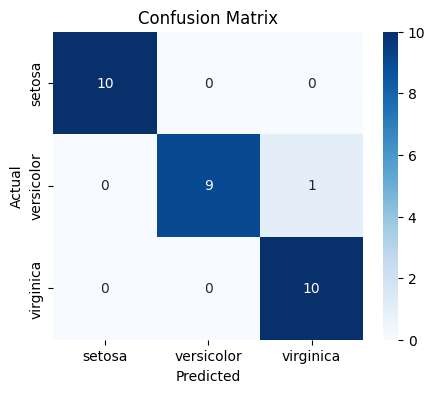

Cross-Validation Accuracy (Random Forest): 0.9667 ± 0.0167


In [306]:
# Split data into training and testing sets
X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=8,            # Reduce tree depth
    min_samples_split=5,    # Require more samples to split a node
    min_samples_leaf=3,     # Require more samples per leaf
    max_features='sqrt',    # Use fewer features per tree
    random_state=42
)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### **Cross-validation to check for overfitting**
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)
print(f"Cross-Validation Accuracy (Random Forest): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

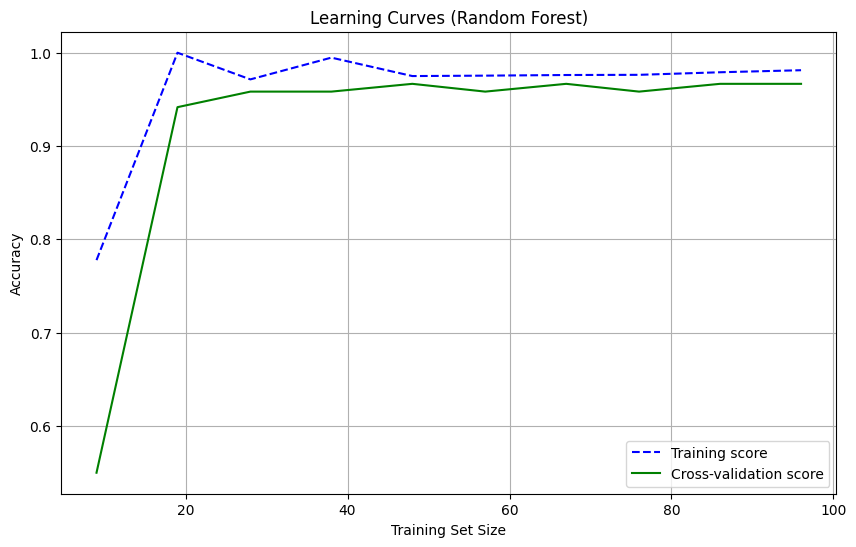

In [307]:
# Learning Curves to check for overfitting
train_sizes, train_scores, test_scores = learning_curve(rf_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Training score", color="blue", linestyle='--')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Cross-validation score", color="green", linestyle='-')
plt.title("Learning Curves (Random Forest)")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.show()


In [308]:
# Compute learning curve scores
train_sizes, train_scores, test_scores = learning_curve(rf_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# Compute mean training and validation scores
mean_train_scores = np.mean(train_scores, axis=1)
mean_test_scores = np.mean(test_scores, axis=1)

# Compute generalization gap
generalization_gap = mean_train_scores - mean_test_scores

# Print results
for size, train, test, gap in zip(train_sizes, mean_train_scores, mean_test_scores, generalization_gap):
    print(f"Training Size: {size}, Train Score: {train:.4f}, Test Score: {test:.4f}, Generalization Gap: {gap:.4f}")

Training Size: 9, Train Score: 0.7778, Test Score: 0.5500, Generalization Gap: 0.2278
Training Size: 19, Train Score: 1.0000, Test Score: 0.9417, Generalization Gap: 0.0583
Training Size: 28, Train Score: 0.9714, Test Score: 0.9583, Generalization Gap: 0.0131
Training Size: 38, Train Score: 0.9947, Test Score: 0.9583, Generalization Gap: 0.0364
Training Size: 48, Train Score: 0.9750, Test Score: 0.9667, Generalization Gap: 0.0083
Training Size: 57, Train Score: 0.9754, Test Score: 0.9583, Generalization Gap: 0.0171
Training Size: 67, Train Score: 0.9761, Test Score: 0.9667, Generalization Gap: 0.0095
Training Size: 76, Train Score: 0.9763, Test Score: 0.9583, Generalization Gap: 0.0180
Training Size: 86, Train Score: 0.9791, Test Score: 0.9667, Generalization Gap: 0.0124
Training Size: 96, Train Score: 0.9812, Test Score: 0.9667, Generalization Gap: 0.0146


##**EDA using binning for the petal_width column**

In [309]:
df['petal_width_qcut'] = pd.qcut(df['petal width (cm)'], q=9, duplicates="drop")

In [310]:
df.groupby('petal_width_qcut')['target'].value_counts()

<ipython-input-310-b8b6c66591bd>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('petal_width_qcut')['target'].value_counts()


petal_width_qcut  target
(0.099, 0.2]      0         34
                  1          0
                  2          0
(0.2, 0.211]      0          0
                  1          0
                  2          0
(0.211, 0.867]    0         16
                  1          0
                  2          0
(0.867, 1.3]      1         28
                  0          0
                  2          0
(1.3, 1.4]        1          7
                  2          1
                  0          0
(1.4, 1.6]        1         13
                  2          3
                  0          0
(1.6, 1.889]      2         12
                  1          2
                  0          0
(1.889, 2.144]    2         17
                  0          0
                  1          0
(2.144, 2.5]      2         17
                  0          0
                  1          0
Name: count, dtype: int64

In [311]:
df['petal_width_qcut'] = df['petal_width_qcut'].astype(str)

In [312]:
# Mapping the percentages
percentage_mapping = {
    '(0.099, 0.2]': 99.9,
    '(0.2, 0.211]': 0,
    '(0.211, 0.867]': 99.9,
    '(0.867, 1.3]': 99.9,
    '(1.3, 1.4]': 87.5,
    '(1.4, 1.6]': 81.25,
    '(1.6, 1.889]': 85.7,
    '(1.889, 2.144]': 99.9,
    '(2.144, 2.5]': 99.9
}

In [313]:
df['petal_width_prob'] = df['petal_width_qcut'].map(percentage_mapping)

In [314]:

# Performing the mapping based on the string values of the bin categories
df.loc[df['petal_width_qcut'] == '(0.099, 0.2]', 'petal_width_qcut'] = 0 # 100%
df.loc[(df['petal_width_qcut'] == '(0.2, 0.211]'), 'petal_width_qcut'] = 1 # The bin is originally empty
df.loc[(df['petal_width_qcut'] == '(0.211, 0.867]'), 'petal_width_qcut'] = 0  # 100%
df.loc[(df['petal_width_qcut'] == '(0.867, 1.3]'), 'petal_width_qcut'] = 1  # 100%
df.loc[(df['petal_width_qcut'] == '(1.3, 1.4]'), 'petal_width_qcut'] = 1
df.loc[(df['petal_width_qcut'] == '(1.4, 1.6]'), 'petal_width_qcut'] = 1
df.loc[(df['petal_width_qcut'] == '(1.6, 1.889]'), 'petal_width_qcut'] = 2
df.loc[(df['petal_width_qcut'] == '(1.889, 2.144]'), 'petal_width_qcut'] = 2  # 100%
df.loc[df['petal_width_qcut'] == '(2.144, 2.5]', 'petal_width_qcut'] = 2  # 100%

In [315]:
df['petal_width_qcut'] = df['petal_width_qcut'].fillna(-1).astype(int)

<ipython-input-315-bc758a81be98>:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['petal_width_qcut'] = df['petal_width_qcut'].fillna(-1).astype(int)


In [316]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target', 'petal_length_qcut', 'petal_length_prob',
       'sepal_width_qcut', 'sepal_width_prob', 'sepal_length_qcut',
       'sepal_length_prob', 'petal_width_qcut', 'petal_width_prob'],
      dtype='object')

In [317]:
# df = df.drop(columns=['sepal_width_qcut', 'sepal_length_qcut','petal_length_prob','petal_width_prob'])

Accuracy: 0.9667

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



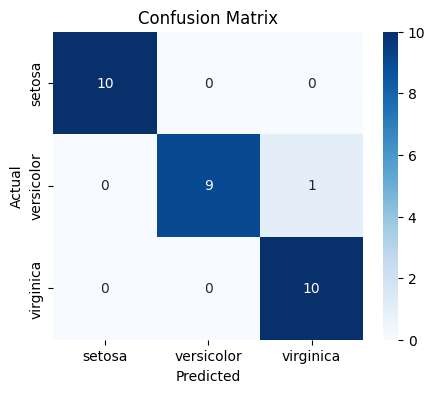

Cross-Validation Accuracy (Random Forest): 0.9583 ± 0.0000


In [318]:
# Split data into training and testing sets
X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=8,            # Reduce tree depth
    min_samples_split=5,    # Require more samples to split a node
    min_samples_leaf=3,     # Require more samples per leaf
    max_features='sqrt',    # Use fewer features per tree
    random_state=42
)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### **Cross-validation to check for overfitting**
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)
print(f"Cross-Validation Accuracy (Random Forest): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

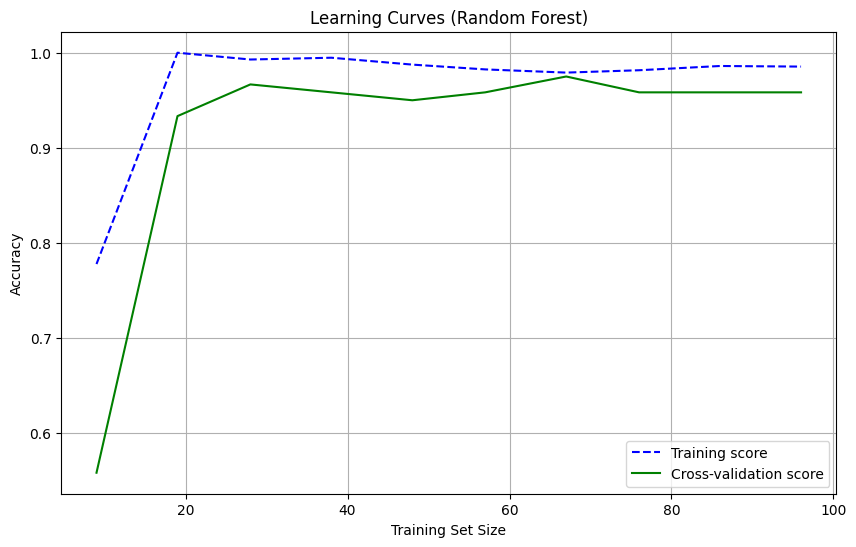

In [320]:
# Learning Curves to check for overfitting
train_sizes, train_scores, test_scores = learning_curve(rf_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Training score", color="blue", linestyle='--')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Cross-validation score", color="green", linestyle='-')
plt.title("Learning Curves (Random Forest)")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.show()


In [321]:
# Compute learning curve scores
train_sizes, train_scores, test_scores = learning_curve(rf_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# Compute mean training and validation scores
mean_train_scores = np.mean(train_scores, axis=1)
mean_test_scores = np.mean(test_scores, axis=1)

# Compute generalization gap
generalization_gap = mean_train_scores - mean_test_scores

# Print results
for size, train, test, gap in zip(train_sizes, mean_train_scores, mean_test_scores, generalization_gap):
    print(f"Training Size: {size}, Train Score: {train:.4f}, Test Score: {test:.4f}, Generalization Gap: {gap:.4f}")

Training Size: 9, Train Score: 0.7778, Test Score: 0.5583, Generalization Gap: 0.2194
Training Size: 19, Train Score: 1.0000, Test Score: 0.9333, Generalization Gap: 0.0667
Training Size: 28, Train Score: 0.9929, Test Score: 0.9667, Generalization Gap: 0.0262
Training Size: 38, Train Score: 0.9947, Test Score: 0.9583, Generalization Gap: 0.0364
Training Size: 48, Train Score: 0.9875, Test Score: 0.9500, Generalization Gap: 0.0375
Training Size: 57, Train Score: 0.9825, Test Score: 0.9583, Generalization Gap: 0.0241
Training Size: 67, Train Score: 0.9791, Test Score: 0.9750, Generalization Gap: 0.0041
Training Size: 76, Train Score: 0.9816, Test Score: 0.9583, Generalization Gap: 0.0232
Training Size: 86, Train Score: 0.9860, Test Score: 0.9583, Generalization Gap: 0.0277
Training Size: 96, Train Score: 0.9854, Test Score: 0.9583, Generalization Gap: 0.0271
